In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
features, targets = make_classification(n_samples = 20,
                                      n_features = 2,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

Let's put this data into a `pandas` DataFrame to see what it looks like.

In [ ]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


Let's check the `shape` of our data. This tells us (rows, columns).

In [ ]:
df

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0
5,0.234416,1.405825,1
6,0.530355,-1.292116,0
7,-0.122890,-0.667896,0
8,-0.845206,1.760128,1
9,1.659802,1.063621,1


In [ ]:
features.shape

(20, 2)

In [ ]:
targets.shape

(20,)

`np.bincount` is a quick way to count how many samples of each class we have.

In [ ]:
np.bincount(targets)

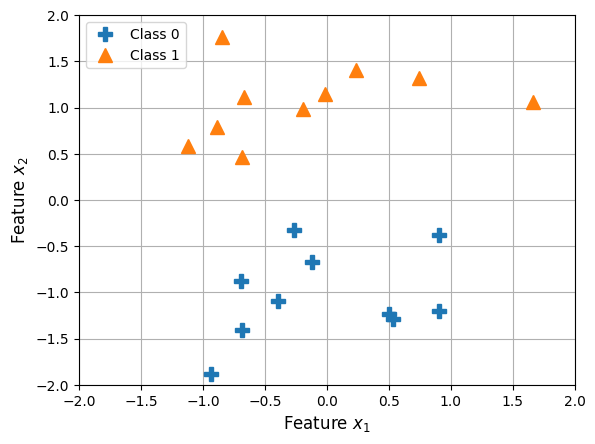

In [ ]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [ ]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [ ]:
ppn.bias

0

In [ ]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2) # Re-initialize with 2 features
x = [1.23, 2.13]
ppn.forward(x)

0

In [ ]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

In [ ]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [ ]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

In [ ]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [ ]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

In [ ]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    # z = w1*x1 + w2*x2 + b = 0
    # => x2 = (-w1*x1 - b) / w2

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

In [ ]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

# Plot the decision boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()